# Procesamiento de Lenguage Natural

## Taller 10: Twitter

# 1. Autenticarse con twitter

In [1]:
import pandas as pd
import tweepy

In [2]:
#ruta de trabajo
ruta = "C:/Archivo/"

In [3]:
# Leer llaves
keys = pd.read_csv(ruta + "keys_tokens.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [103]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['key1'], keys['key2'])
auth.set_access_token(keys['token1'], keys['token2'])
#hace pausas en la recolección de información para evitar bloqueos por parte de twitter
api = tweepy.API(auth, wait_on_rate_limit=True)
#http://www.unicode.org/emoji/charts/full-emoji-list.html#1f92b
print(emoji.emojize('Las claves son secretas!!! :shushing_face::shushing_face::tongue::tongue:'))

Las claves son secretas!!! 🤫🤫👅👅


# 2. Recolectar Datos
## Se realizó una revisión de las tendencias en Twitter del día 07 de noviembre de 2020, con las publicaciones realizadas en Colombia se seleccionó las elecciones presidenciales de Estados Unidos.

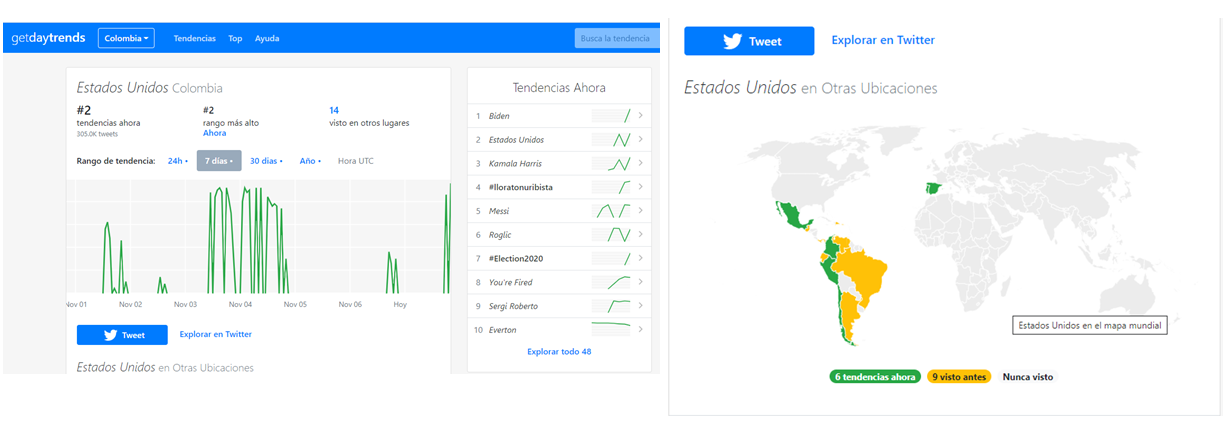

In [29]:
import PIL.Image
from IPython.display import display

tendencia2 = PIL.Image.open(ruta + "Tendencia_2.png")
display(tendencia2)

### 2.1 Se realiza el cargue del archivo de cordenadas de ciudades de Colombia

In [7]:
ciudades = pd.read_csv(ruta + 'co_small.csv')
ciudades.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bogotá,4.649178,-74.062827,Colombia,CO,Bogotá,primary,7772000.0,6333661.0
1,Medellín,6.251840,-75.563591,Colombia,CO,Antioquia,admin,3297000.0,1999979.0
2,Cali,3.437222,-76.522500,Colombia,CO,Valle del Cauca,admin,2254000.0,2178836.0
3,Barranquilla,10.963889,-74.796389,Colombia,CO,Atlántico,admin,1798000.0,1244491.0
4,Bucaramanga,7.125393,-73.119804,Colombia,CO,Santander,admin,1009000.0,571820.0


### 2.2 Extraer información de acuerdo con las coordenadas a traves de un bucle

In [27]:
all_tweets = [] 

for ciudad in ciudades.iterrows():
    c = ciudad[1]
    gc = f"{c.lat},{c.lng},100km"                                 #coordenadas con rango de 100 Km alrededor
    c_name = c.city
    
    tweets = tweepy.Cursor(api.search,
                       q=['elecciones Estados Unidos -RT'],       #Frase de busqueda. -RT: para no capturar re tweets
                       lang='es',                                 #idioma  
                       geocode=gc,                                #coordenadas
                       tweet_mode='extended',                     #extended para que salga todo el texto
                       include_rts=False).items(100)              #número de tweets
    
    t = []

    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)                                #Texto
        temp.append(tweet.created_at)                               #fecha
        temp.append(c_name)                                         #Ciudad
        temp.append(tweet.user.location)                            #Usuario
        temp.append(tweet.place)                                    #Lugar que registra el propietario de la cuenta
        temp.append(tweet.coordinates)                              #coordenadas
        temp.append(tweet.id)                                       #código que Twitter asigna a las cuentas (es unico)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}") #link del tweet
        t.append(temp)
    all_tweets.extend(t)
    print(c_name)  

Bogotá
Medellín
Cali
Barranquilla
Bucaramanga
Cartagena
Cúcuta
Pereira
Santa Marta
Ibagué
Pasto
Manizales
Villavicencio
Neiva
Armenia
Valledupar
Montería
Sincelejo
Popayán
Tunja
Ríohacha
Florencia
Quibdó
Arauca
Yopal
Leticia
San Andrés
San José del Guaviare
Mocoa
Puerto Carreño
Mitú
Inírida


In [30]:
data = pd.DataFrame(all_tweets)
data.columns = ['tweet', 'date', 'city', 'user_location', 'place', 'coordinates', 'id', 'link']
data

,tweet,date,city,user_location,place,coordinates,id,link
0,@omarbula Estas elecciones han en Estados Unid...,2020-11-08 00:53:18,Bogotá,Bogota DC,None,None,1325239943132803073,https://twitter.com/i/web/status/1325239943132...
1,Gente alegando que hubo fraude en las eleccion...,2020-11-08 00:52:25,Bogotá,Bogotá,None,None,1325239721187028993,https://twitter.com/i/web/status/1325239721187...
2,"@RodrigoGF91 Esta nota es larga, pero es inter...",2020-11-08 00:32:42,Bogotá,"Bogotá, D.C., Colombia",None,None,1325234757530218496,https://twitter.com/i/web/status/1325234757530...
3,"🇺🇸🌎 Ella es Jill Biden, la próxima primera dam...",2020-11-08 00:30:57,Bogotá,Bogotá,None,None,1325234318000713729,https://twitter.com/i/web/status/1325234318000...
4,Los cinco estados que Biden arrebató a Trump p...,2020-11-08 00:26:03,Bogotá,"Bogotá, DC, Colombia",None,None,1325233084170608641,https://twitter.com/i/web/status/1325233084170...
...,...,...,...,...,...,...,...,...
2505,#2noviembre TRUMP vs BIDEN \n\nDos candidatos ...,2020-11-02 14:09:25,Puerto Carreño,Isla Margarita,None,None,1323265962863431682,https://twitter.com/i/web/status/1323265962863...
2506,Así están las encuestas en Estados Unidos: ¿Qu...,2020-11-02 00:18:11,Puerto Carreño,Portugal,None,None,1323056776732966912,https://twitter.com/i/web/status/1323056776732...
2507,Lo que se demuestra en las elecciones de est...,2020-11-06 14:07:00,Inírida,"Amazonas, Venezuela",None,None,1324714908534059009,https://twitter.com/i/web/status/1324714908534...
2508,No es facil inmolarse para ir preso x alguna s...,2020-11-05 15:08:49,Inírida,"Amazonas, Venezuela",None,None,1324368076721278977,https://twitter.com/i/web/status/1324368076721...


## 2.3 Revisión de la cantidad de registros nulos por campo capturado:

In [31]:
print(f"registros nulos en el campo tweet = {data.tweet.isna().sum()}") 
print(f"registros nulos en el campo date = {data.date.isna().sum()}")
print(f"registros nulos en el campo city = {data.city.isna().sum()}") 
print(f"registros nulos en el campo user_location = {data.user_location.isna().sum()}") 
print(f"registros nulos en el campo place = {data.place.isna().sum()}")
print(f"registros nulos en el campo id = {data.id.isna().sum()}") 
print(f"registros nulos en el campo link = {data.link.isna().sum()}") 

registros nulos en el campo tweet = 0
registros nulos en el campo date = 0
registros nulos en el campo city = 0
registros nulos en el campo user_location = 0
registros nulos en el campo place = 2316
registros nulos en el campo id = 0
registros nulos en el campo link = 0


# 3. Pre-procesamiento de emoji, link y hashtags

In [55]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

### 3.1 Se incluye en el dataframe los datos en limpio

In [33]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions
0,@omarbula Estas elecciones han en Estados Unid...,2020-11-08 00:53:18,Bogotá,Bogota DC,None,None,1325239943132803073,https://twitter.com/i/web/status/1325239943132...,Estas elecciones han en Estados Unidos han de...,[],[],[@omarbula]
1,Gente alegando que hubo fraude en las eleccion...,2020-11-08 00:52:25,Bogotá,Bogotá,None,None,1325239721187028993,https://twitter.com/i/web/status/1325239721187...,Gente alegando que hubo fraude en las eleccion...,[],[],[]
2,"@RodrigoGF91 Esta nota es larga, pero es inter...",2020-11-08 00:32:42,Bogotá,"Bogotá, D.C., Colombia",None,None,1325234757530218496,https://twitter.com/i/web/status/1325234757530...,"Esta nota es larga, pero es interesante. El t...",[https://t.co/Zw208RXBaI],[],[@RodrigoGF91]
3,"🇺🇸🌎 Ella es Jill Biden, la próxima primera dam...",2020-11-08 00:30:57,Bogotá,Bogotá,None,None,1325234318000713729,https://twitter.com/i/web/status/1325234318000...,"🇺🇸🌎 Ella es Jill Biden, la próxima primera dam...","[https://t.co/vCNKRXPgzr, https://t.co/OUaB7jg...",[#Elecciones2020],[]
4,Los cinco estados que Biden arrebató a Trump p...,2020-11-08 00:26:03,Bogotá,"Bogotá, DC, Colombia",None,None,1325233084170608641,https://twitter.com/i/web/status/1325233084170...,Los cinco estados que Biden arrebató a Trump p...,"[https://t.co/1xkayFbjkn, https://t.co/H2PmweI...",[],[]


# 4. Visualización de la información capturada utilizando Plotly:

In [49]:
#conda install -c plotly plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [50]:
#Se toma la fecha y se formatea, contando los tweets por fecha
data['fecha'] = data.date.dt.date
data_graf = pd.DataFrame(data.fecha.value_counts()).reset_index()
data_graf.columns = ['fecha', 'cnt']
data_graf = data_graf.sort_values('fecha')
data_graf

,fecha,cnt
8,2020-10-31,1
7,2020-11-01,5
6,2020-11-02,16
5,2020-11-03,31
3,2020-11-04,140
2,2020-11-05,164
1,2020-11-06,297
0,2020-11-07,1737
4,2020-11-08,119


In [57]:
trace = go.Scatter(x=data_graf.fecha.values,
                   y=data_graf.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(data_graf.fecha.values,data_graf.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})
layout = go.Layout(title='Número de tuits por día')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)                   

## Los resultados gráficos son apenas obvios, la tendencia del día 07 de noviembre es más alta debida a la confirmación de Joe Biden como ganador de las elecciones presidenciales de Estados Unidos.

# 5. Nube de palabras con la información capturada:

In [61]:
import numpy as np
import pandas as pd

#para instalar en anaconda -->> conda install -c conda-forge wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

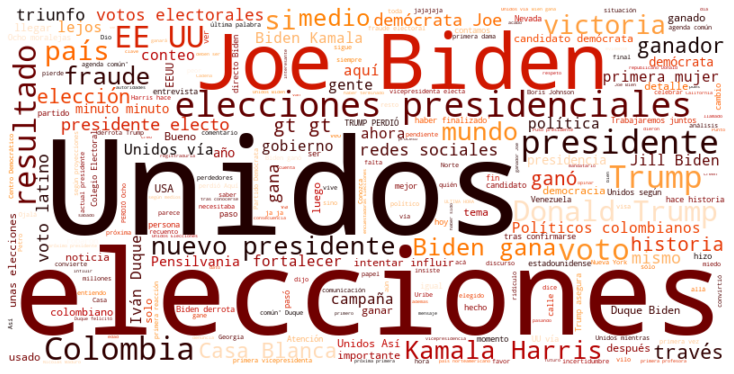

In [53]:
palabras = data.clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 6. Visualización de emojis

In [69]:
#conda install -c conda-forge regex
import regex
#conda install -c conda-forge emoji
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [75]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head(20)

,emoji,cnt
1,🇺🇸,117
0,🤡,104
19,🤣,93
3,👉,81
14,🔴,62
10,👇,32
13,⚠️,31
11,➡️,27
44,🤦🏻‍♂️,26
9,🚨,25


In [74]:
num_emojis = 20 #Cantidad de emojis para visualizar en una gráfica de barras.

trace = go.Bar(x=temp_emojis.emoji.values[:num_emojis],
               y=temp_emojis.cnt.values[:num_emojis]) 

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)